# Importing Librariries and dataset

In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing
# Data Vizulization
import seaborn as sns
import matplotlib.pyplot as plt 

# Splitting the data
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold

# Machine learning Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

# For Hyper-parameter Tuning the model
from sklearn.model_selection import GridSearchCV

# For checking Model Performance

from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics

#For data standization 
from sklearn.preprocessing import StandardScaler

# Importing sythetic over sampling technique algorithm
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


In [2]:
#loading data
fetal_path=("D:/2020/fetal health classifier/fetal_health.csv")
fetal_data=pd.read_csv(fetal_path, encoding="ISO-8859-1")
fetal_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## Exploratory Data Analysis (EDA)

### ### Checking the presence of missing values 


In [3]:
fetal_data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

#### The fetal health dataset has no missing values

### Target feature exploring 

In [234]:
fetal_data['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

#### The dataset is umbalanced, we have 1 as a majority value, 2 and 3 as minorities 

In [235]:
# Exploring the shape of data, number of feautures and samples 
fetal_data.shape

(2126, 22)

In [236]:
#Data values spread using the describe method 
fetal_data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


#### We have a clear homogenous dataset of 2126 fetal sample and 21 features which are the cardiotocography output and the fetal health as a labeled target

## Data visualization

### Visualization of the target distribution (fetat state)

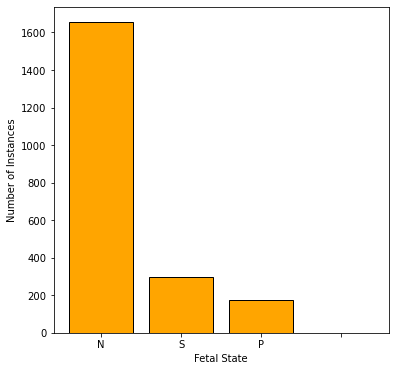

In [237]:
count = np.zeros(4)
for i in range(4):
    count[i] = np.where(y == i+1)[0].size
    
plt.subplots(figsize = (6.0,6.0))
plt.bar(np.arange(4),count,color = 'orange',edgecolor = 'black')
plt.xticks(np.arange(4),('N','S','P'))
plt.xlabel('Fetal State')
plt.ylabel('Number of Instances')
plt.show()


### Visualization of the correlation map

In [239]:
fetal_data.drop(['baseline value', 'severe_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'histogram_width', 'histogram_min', 'histogram_mode', 'histogram_mean', 'histogram_median'], axis='columns', inplace=True)

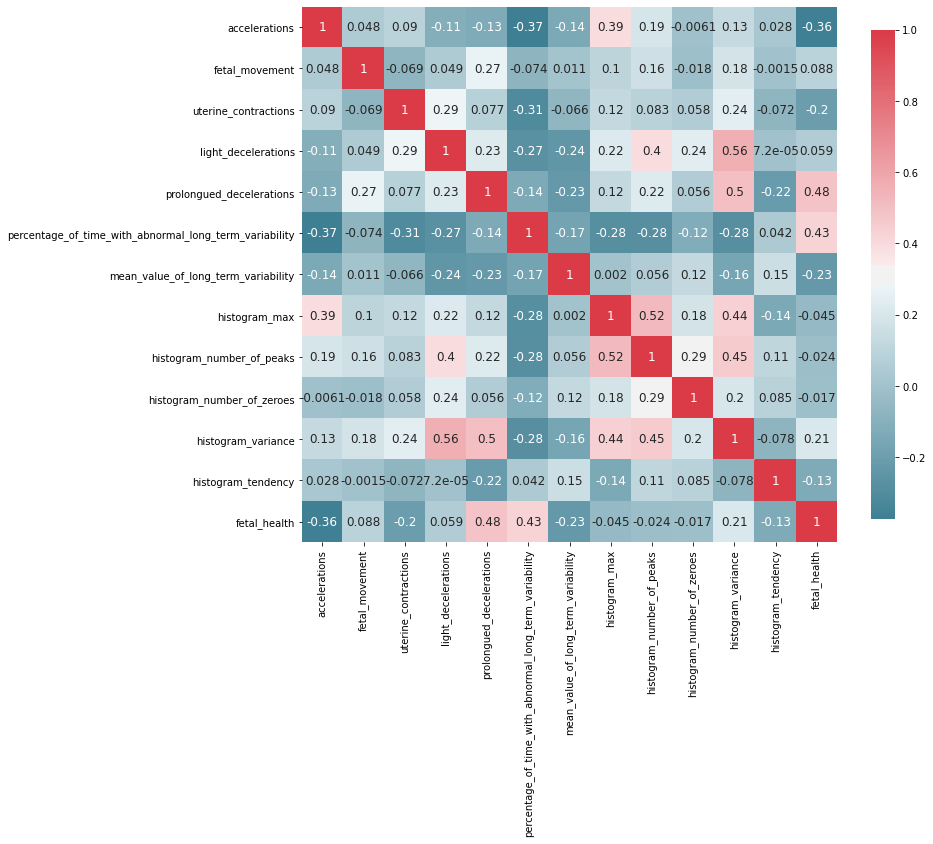

In [240]:
#Correlation map between all features 
def plot_correlation_map( fetal_data ):

    corr = fetal_data.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(fetal_data)

#### Here I am going to extract only the most important features based on the correlation map values, and then built a KNN classifier that allow us to predict the health of fetals using Cardiotogram exams outputs
#### The most important features are : accelerations', 'uterine_contractions', 'prolongued_decelerations','percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_variance', 'histogram_tendency'


## Data transformation

#### Data Scaling 

In [4]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(fetal_data.drop(["fetal_health"],axis = 1),), columns = columns)


In [246]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [10]:
y=fetal_data['fetal_health']
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

#### KNN model with test_size of 20% and most important features :

In [5]:
#Choosing the features as x and the target as y 
x=fetal_data[['accelerations', 'uterine_contractions', 'prolongued_decelerations','percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_variance', 'histogram_tendency']]
y=fetal_data['fetal_health']

In [6]:
#split the feta health dataset into a training set and testing set

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=30)

In [7]:
# Chooosing the optimal k value
score=[]
for i in range(1,46) : 
    knn=KNeighborsClassifier(n_neighbors=i)
    modelknn=knn.fit(x_train, y_train)
    predknn=modelknn.predict(x_test)
    w=accuracy_score(predknn, y_test)
    score.append(round(w,4))
score.index(max(score))

14

In [8]:
#build our knn classifier for fetal health
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print("Accuracy = ", accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

Accuracy =  0.8286384976525821
              precision    recall  f1-score   support

         1.0       0.95      0.85      0.90       369
         2.0       0.38      0.63      0.47        35
         3.0       0.45      0.77      0.57        22

    accuracy                           0.83       426
   macro avg       0.59      0.75      0.65       426
weighted avg       0.88      0.83      0.85       426



In [15]:
#Confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  1.0  2.0  3.0
Actual                  
1.0        314   11    5
2.0         36   22    0
3.0         19    2   17


## Using all features as inputs to enhance accuracy

## Aplying KNN model 

In [16]:
#Choosing the features as x and the target as y 
x=fetal_data[['baseline value','accelerations', 'fetal_movement', 'uterine_contractions','light_decelerations','severe_decelerations', 'prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks', 'histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance', 'histogram_tendency']]
y=fetal_data['fetal_health']

In [17]:
#split the feta health dataset into a training set and testing set

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=30)

In [272]:
# Chooosing the optimal k value
score=[]
for i in range(1,46) : 
    knn=KNeighborsClassifier(n_neighbors=i)
    modelknn=knn.fit(x_train, y_train)
    predknn=modelknn.predict(x_test)
    w=accuracy_score(predknn, y_test)
    score.append(round(w,4))
score.index(max(score))

2

In [274]:
#build our knn classifier for fetal health
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print("Accuracy = ", accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

Accuracy =  0.8967136150234741
              precision    recall  f1-score   support

         1.0       0.97      0.91      0.94       349
         2.0       0.55      0.78      0.65        41
         3.0       0.82      0.86      0.84        36

    accuracy                           0.90       426
   macro avg       0.78      0.85      0.81       426
weighted avg       0.91      0.90      0.90       426



In [275]:
#Confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  1.0  2.0  3.0
Actual                  
1.0        319    6    5
2.0         26   32    0
3.0          4    3   31


#### We deduct that the KNN prediction model is more effecient when we feed it with all features than using only more correlated ones. So all features count 

#### Applying synthetic minority oversampling methode SMOTE to deal with imbalanced data 

In [276]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state =2) 
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel()) 

In [277]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 3)))

After OverSampling, the shape of train_X: (3975, 21)
After OverSampling, the shape of train_y: (3975,) 

After OverSampling, counts of label '1': 1325
After OverSampling, counts of label '2': 1325
After OverSampling, counts of label '2': 1325


In [278]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_res, y_train_res.ravel())
y_pred=knn.predict(x_test)
print("Accuracy = ", accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

Accuracy =  0.8615023474178404
              precision    recall  f1-score   support

         1.0       0.87      0.97      0.92       294
         2.0       0.83      0.56      0.67        86
         3.0       0.87      0.72      0.79        46

    accuracy                           0.86       426
   macro avg       0.85      0.75      0.79       426
weighted avg       0.86      0.86      0.85       426



In [279]:
#Confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  1.0  2.0  3.0
Actual                  
1.0        286   35    9
2.0          6   48    4
3.0          2    3   33


In [282]:
# apply near miss algorithm to make majority dataset under sampling
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
x_train_miss, y_train_miss = nr.fit_sample(x_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(x_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '2': {}".format(sum(y_train_miss == 2))) 
print("After Undersampling, counts of label '3': {}".format(sum(y_train_miss == 3)))

After Undersampling, the shape of train_X: (414, 21)
After Undersampling, the shape of train_y: (414,) 

After Undersampling, counts of label '1': 138
After Undersampling, counts of label '2': 138
After Undersampling, counts of label '3': 138


In [283]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_miss, y_train_miss.ravel())
y_pred=knn.predict(x_test)
print("Accuracy = ", accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

Accuracy =  0.8380281690140845
              precision    recall  f1-score   support

         1.0       0.89      0.92      0.91       320
         2.0       0.53      0.60      0.56        52
         3.0       0.82      0.57      0.67        54

    accuracy                           0.84       426
   macro avg       0.75      0.70      0.72       426
weighted avg       0.84      0.84      0.84       426



In [284]:
#Confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  1.0  2.0  3.0
Actual                  
1.0        295   17   18
2.0         22   31    5
3.0          3    4   31


#### We get lower accuracy and precision values when we apply under-sampling using near miss method 
#### By applying minority over sampling method using SMOTE method we get higher accuracy, recall and precision

### KFold Cross validation

In [18]:
kfold = KFold(n_splits=10)
model_kfold = KNeighborsClassifier(n_neighbors=7)
results_kfold = cross_val_score(model_kfold,x_train,y_train, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 88.12%


In [19]:
results_kfold

array([0.85882353, 0.87058824, 0.91176471, 0.9       , 0.87647059,
       0.89411765, 0.89411765, 0.87647059, 0.88235294, 0.84705882])

In [20]:
model_kfold.fit(x_train,y_train)
y_f=model_kfold.predict(x_test)
print("Accuracy = ", accuracy_score(y_f, y_test))
print(classification_report(y_f, y_test))

Accuracy =  0.8943661971830986
              precision    recall  f1-score   support

         1.0       0.97      0.92      0.94       348
         2.0       0.57      0.77      0.65        43
         3.0       0.76      0.83      0.79        35

    accuracy                           0.89       426
   macro avg       0.77      0.84      0.80       426
weighted avg       0.91      0.89      0.90       426



In [21]:
#Confusion matrix
confusion_matrix=pd.crosstab(y_test,y_f, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  1.0  2.0  3.0
Actual                  
1.0        319    7    4
2.0         23   33    2
3.0          6    3   29


### hyper parameter tuning in order to determine the optimal values using GridSearchCV

In [29]:
#Choosing the features as x and the target as y 
x=fetal_data[['baseline value','accelerations', 'fetal_movement', 'uterine_contractions','light_decelerations','severe_decelerations', 'prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks', 'histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance', 'histogram_tendency']]
y=fetal_data['fetal_health']

In [147]:
#split the feta health dataset into a training set and testing set

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=30)

In [148]:
k_range = list(range(2,46))
weight_options = ["uniform", "distance"]
algo_option=['auto', 'ball_tree', 'kd_tree', 'brute']
params = dict(n_neighbors = k_range, weights = weight_options, algorithm=algo_option)
         

cv_method = StratifiedKFold(n_splits=3, shuffle=True)



In [149]:
GridSearchCV_knn = GridSearchCV(estimator=KNeighborsClassifier(), 
                       param_grid=params,
                       cv=cv_method,
                       n_jobs=2,
                       scoring="accuracy"
                      )


In [150]:
GridSearchCV_knn.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [151]:
# Picking the best hyper paramters to tune the model
best_params_knn = GridSearchCV_knn.best_params_
best_params_knn

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

In [152]:
knn_model=KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model.fit(x_train, y_train)
ypred_=knn_model.predict(x_test)
print("Accuracy = ", accuracy_score(ypred_, y_test))
print(classification_report(ypred_, y_test))

Accuracy =  0.841692789968652
              precision    recall  f1-score   support

         1.0       0.91      0.90      0.91       505
         2.0       0.52      0.60      0.55        72
         3.0       0.70      0.64      0.67        61

    accuracy                           0.84       638
   macro avg       0.71      0.71      0.71       638
weighted avg       0.85      0.84      0.84       638



In [153]:
#Confusion matrix
confusion_matrix=pd.crosstab(y_test,ypred_, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  1.0  2.0  3.0
Actual                  
1.0        455   25   19
2.0         37   43    3
3.0         13    4   39


## Random Forest model 

In [23]:
#split the feta health dataset into a training set and testing set

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=30)

In [24]:
#Apllying the random forest model to our data 
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_=clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_))
print(classification_report(y_, y_test))

Accuracy :  0.9483568075117371
              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97       338
         2.0       0.76      0.86      0.81        51
         3.0       0.95      0.97      0.96        37

    accuracy                           0.95       426
   macro avg       0.90      0.93      0.91       426
weighted avg       0.95      0.95      0.95       426



In [25]:
#Confusion matrix
confusion_matrix=pd.crosstab(y_test,y_, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  1.0  2.0  3.0
Actual                  
1.0        324    6    0
2.0         13   44    1
3.0          1    1   36


#### Trying to enhance Random Forest effeciency by  paramaters tuning(changing random state parameter)

In [30]:
#split the feta health dataset into a training set and testing set

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=25)

In [27]:
#Apllying the random forest model to our data 
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_=clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_))
print(classification_report(y_, y_test))

Accuracy :  0.9530516431924883
              precision    recall  f1-score   support

         1.0       0.98      0.97      0.98       330
         2.0       0.83      0.86      0.85        58
         3.0       0.88      0.97      0.93        38

    accuracy                           0.95       426
   macro avg       0.90      0.93      0.92       426
weighted avg       0.95      0.95      0.95       426



In [28]:
#Confusion matrix
confusion_matrix=pd.crosstab(y_test,y_, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  1.0  2.0  3.0
Actual                  
1.0        319    5    0
2.0          9   50    1
3.0          2    3   37


### Find out the best parameters using GridSearchCV

In [37]:
params_RF = {"min_samples_split": [2, 6, 20],
             "min_samples_leaf": [1, 4, 16],
             "n_estimators" :[100,150, 200, 250],
             "criterion": ["gini"]             
            }


In [39]:
cv_method = StratifiedKFold(n_splits=3)

In [40]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=params_RF, 
                                cv=cv_method,
                                n_jobs=2,
                                scoring="accuracy"
                              )

In [41]:
GridSearchCV_RF.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini'], 'min_samples_leaf': [1, 4, 16],
                         'min_samples_split': [2, 6, 20],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='accuracy')

In [42]:
best_params_RF = GridSearchCV_RF.best_params_
best_params_RF

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [43]:
rf = RandomForestClassifier(criterion="gini", n_estimators = 100, min_samples_leaf=1, min_samples_split=6, random_state=42)
rf.fit(x_train, y_train)
y_pred1=rf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred1))
print(classification_report(y_pred1, y_test))

Accuracy :  0.9530516431924883
              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97       328
         2.0       0.83      0.88      0.85        57
         3.0       0.93      0.95      0.94        41

    accuracy                           0.95       426
   macro avg       0.91      0.93      0.92       426
weighted avg       0.95      0.95      0.95       426



In [44]:
#Confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred1, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  1.0  2.0  3.0
Actual                  
1.0        317    5    2
2.0         10   50    0
3.0          1    2   39
